In [1]:
import os

In [2]:
import h5py
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import lib

In [4]:
lib.plotting.setup()

In [5]:
onecolumn_kwargs = {
    "width": 2,
    "height": 2,
    "horizontal_margin": 8/12,
    "vertical_margin": 6/12,
    "gutter": 1,
    "fig_width": 3 + 4/12,
    "fig_height": 3,
}
twocolumn_kwargs = {
    "width": 2,
    "height": 2,
    "horizontal_margin": 8/12,
    "vertical_margin": 6/12,
    "gutter": 1 + 8/12,
    "fig_width": 7,
    "fig_height": 3,
}

---

In [6]:
input_file = "../data/N_gamma_alpha_v3_statistical.hdf5"

In [7]:
with h5py.File(input_file, "r") as hf:
    mean = hf["shear/mean"][:]
    cov = hf["shear/cov"][:]
    xi = hf["shear/mean_params"][:]
    alphas = np.unique(xi[:, 0])
    tomos = np.unique(xi[:, 1])

corr = np.corrcoef(cov)

In [8]:
# tmp = np.zeros_like(cov)

# for i in range(11):
#     for j in range(4):
#         tmp[i:i + j, i : i + j] = i + 1
#         for k in range(j):
#             tmp[i:i + j, i + k:j] = j + 1
#             tmp[i + k:j, i:i + j] = j + 1

# plt.imshow(tmp, cmap="cubehelix_r")
# plt.colorbar()
# plt.show()

In [9]:
# tmp = np.zeros_like(cov)

# for i in range(4):
#     tmp[i::4, i::4] = cov[i, i]
#     for j in range(i):
#         tmp[i::4, j::4] = cov[i, j]
#         tmp[j::4, i::4] = cov[j, i]

# norm = mpl.colors.CenteredNorm()
# cmap="RdBu_r"

# fig, axs = plt.subplots(1, 2)
# axs[0].imshow(cov, norm=norm, cmap=cmap)
# axs[1].imshow(tmp, norm=norm, cmap=cmap)
# # plt.colorbar()
# plt.show()

---

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.333333333333333) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


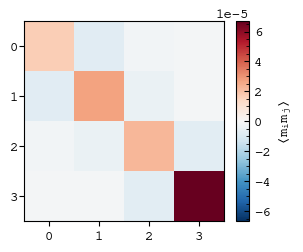

In [10]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **onecolumn_kwargs,
)

im = axs.imshow(cov[:4, :4], norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs, im, label="$〈m_i m_j〉$")

axs.set_xticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs.set_xticks(
    [],
    minor=True,
)

axs.set_yticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs.set_yticks(
    [],
    minor=True,
)

axs.tick_params(
    direction="out",
    top=False,
    right=False,
)

plt.show()

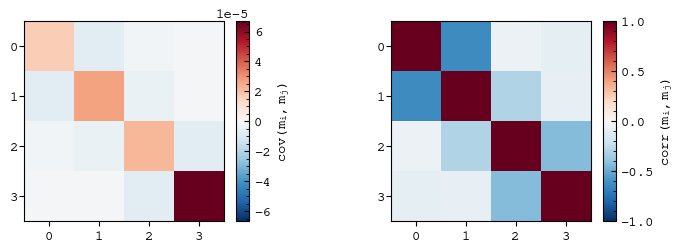

In [11]:
fig, axs = lib.plotting.make_axes(
    1, 2,
    **twocolumn_kwargs,
)

im = axs[0].imshow(cov[:4, :4], norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[0], im, label="$cov(m_i, m_j)$")

axs[0].set_xticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs[0].set_xticks(
    [],
    minor=True,
)

axs[0].set_yticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs[0].set_yticks(
    [],
    minor=True,
)

axs[0].tick_params(
    direction="out",
    top=False,
    right=False,
)

im = axs[1].imshow(corr[:4, :4], norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[1], im, label="$corr(m_i, m_j)$")

axs[1].set_xticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs[1].set_xticks(
    [],
    minor=True,
)

axs[1].set_yticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs[1].set_yticks(
    [],
    minor=True,
)

axs[1].tick_params(
    direction="out",
    top=False,
    right=False,
)

plt.show()

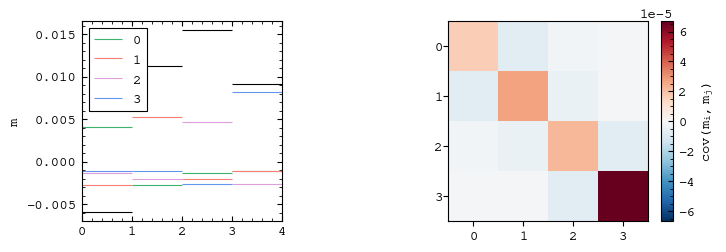

In [12]:
fig, axs = lib.plotting.make_axes(
    1, 2,
    **twocolumn_kwargs,
)

axs[0].hlines(
    mean[:4] - 1,
    tomos,
    tomos + 1,
)
axs[0].hlines(
    (np.sign(cov[:4, :4]) * np.sqrt(np.abs(cov[:4, :4])))[0],
    tomos,
    tomos + 1,
    color="#3BB470",
    label=tomos[0]
)
axs[0].hlines(
    (np.sign(cov[:4, :4]) * np.sqrt(np.abs(cov[:4, :4])))[1],
    tomos,
    tomos + 1,
    color="#FA7F72",
    label=tomos[1]
)
axs[0].hlines(
    (np.sign(cov[:4, :4]) * np.sqrt(np.abs(cov[:4, :4])))[2],
    tomos,
    tomos + 1,
    color="#DD9FDD",
    label=tomos[2]
)
axs[0].hlines(
    (np.sign(cov[:4, :4]) * np.sqrt(np.abs(cov[:4, :4])))[3],
    tomos,
    tomos + 1,
    color="#6495EC",
    label=tomos[3]
)

axs[0].legend(loc="upper left")
axs[0].set_xlim(0, 4)
axs[0].set_ylabel("$m$")

im = axs[1].imshow(cov[:4, :4], norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[1], im, label="$cov(m_i, m_j)$")

axs[1].set_xticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs[1].set_xticks(
    [],
    minor=True,
)

axs[1].set_yticks(
    tomos,
    labels=tomos,
    minor=False,
    ha="center",
)
axs[1].set_yticks(
    [],
    minor=True,
)

axs[1].tick_params(
    direction="out",
    top=False,
    right=False,
)

plt.show()

---

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.333333333333333) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


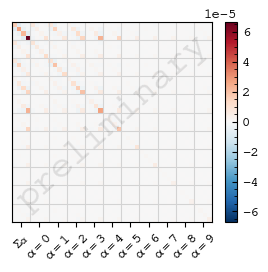

In [13]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **onecolumn_kwargs,
)

im = axs.imshow(cov, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs, im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs.set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs.set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs.set_yticks(
    [],
)
axs.set_yticks(
    [],
    minor=True,
)

axs.tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    # axs.axvline(_i - 0.5, alpha=0.1)
    # axs.axhline(_i - 0.5, alpha=0.1)
    axs.axvline(_i - 0.5, c="lightgray")
    axs.axhline(_i - 0.5, c="lightgray")

lib.plotting.watermark(fig)

fig.savefig("cov.pdf")
plt.show()


/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.333333333333333) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


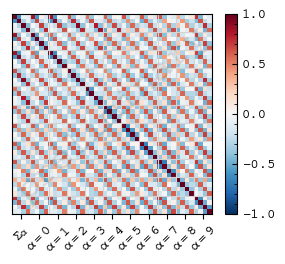

In [15]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **onecolumn_kwargs,
)

im = axs.imshow(corr, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs, im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs.set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs.set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs.set_yticks(
    [],
)
axs.set_yticks(
    [],
    minor=True,
)

axs.tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    # axs.axvline(_i - 0.5, alpha=0.1)
    # axs.axhline(_i - 0.5, alpha=0.1)
    axs.axvline(_i - 0.5, c="lightgray")
    axs.axhline(_i - 0.5, c="lightgray")

lib.plotting.watermark(fig)

fig.savefig("corr.pdf")
plt.show()


---

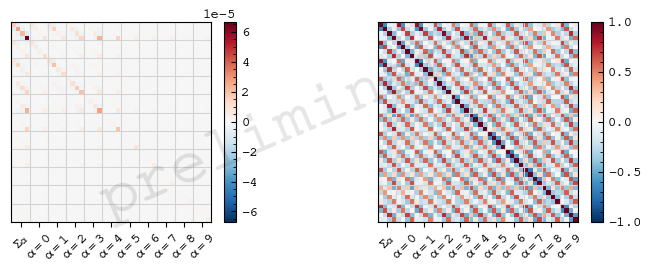

In [16]:
fig, axs = lib.plotting.make_axes(
    1, 2,
    **twocolumn_kwargs,
)

im = axs[0].imshow(cov, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[0], im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs[0].set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs[0].set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs[0].set_yticks(
    [],
)
axs[0].set_yticks(
    [],
    minor=True,
)

axs[0].tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    # axs[0].axvline(_i - 0.5, alpha=0.1)
    # axs[0].axhline(_i - 0.5, alpha=0.1)
    axs[0].axvline(_i - 0.5, c="lightgray")
    axs[0].axhline(_i - 0.5, c="lightgray")

im = axs[1].imshow(corr, norm=mpl.colors.CenteredNorm(), cmap="RdBu_r")
lib.plotting.add_colorbar(axs[1], im)

_xticks = np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]
axs[1].set_xticks(
    _xticks + np.diff(_xticks)[0] / 2 - 0.5,
    # labels=[f"$\\alpha = {alpha}$" for alpha in alphas],
    labels=[
        f"$\\alpha = {alpha}$" if alpha >= 0
        else "$\\Sigma_{\\alpha}$"
        for alpha in alphas
    ],
    minor=False,
    ha="center",
    rotation=45,
)
axs[1].set_xticks(
    [],
    minor=True,
)

# _yticks = np.intersect1d(tomos, xi[:, 1], return_indices=True)[-1]
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=["tomography", "", "", ""],
#     minor=False,
#     ha="right",
#     rotation=90,
# )
# axs.set_yticks(
#     _yticks,
#     # labels=[f"$\\hat{{b}} = {tomo}$" for tomo in tomos],
#     labels=[f"$i = {tomo}$" for tomo in tomos],
#     minor=False,
#     ha="right",
#     # rotation=45,
# )
axs[1].set_yticks(
    [],
)
axs[1].set_yticks(
    [],
    minor=True,
)

axs[1].tick_params(
    direction="out",
    top=False,
    right=False,
)

for _i in np.intersect1d(alphas, xi[:, 0], return_indices=True)[-1]:
    # axs[1].axvline(_i - 0.5, alpha=0.1)
    # axs[1].axhline(_i - 0.5, alpha=0.1)
    axs[1].axvline(_i - 0.5, c="lightgray")
    axs[1].axhline(_i - 0.5, c="lightgray")

lib.plotting.watermark(fig)

fig.savefig("cov-corr.pdf")
plt.show()



In [36]:
ALPHA = {
    -1: (0.0, 6.0),
    0: (0.0, 0.3),
    1: (0.3, 0.6),
    2: (0.6, 0.9),
    3: (0.9, 1.2),
    4: (1.2, 1.5),
    5: (1.5, 1.8),
    6: (1.8, 2.1),
    7: (2.1, 2.4),
    8: (2.4, 2.7),
    9: (2.7, 6.0),
}

with h5py.File(input_file, "r") as N_gamma_alpha:
    for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
        
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] >= -1
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl
    
        for alpha in alphas:
            print(
                f"{tomographic_bin}",
                f"&",
                f"{alpha}", 
                f"&",
                f"${(Ngammaalpha_mean / zd)[alpha] :+.4f}$",
                f"&",
                f"${(Ngammaalpha_var**(1/2) / zd)[alpha] :.4f}$",
                f"\\\\",
            )


0 & -1 & $+0.0014$ & $0.0003$ \\
0 & 0 & $+0.1657$ & $0.0007$ \\
0 & 1 & $+1.7191$ & $0.0098$ \\
0 & 2 & $+1.3692$ & $0.0101$ \\
0 & 3 & $+0.1171$ & $0.0058$ \\
0 & 4 & $+0.0155$ & $0.0047$ \\
0 & 5 & $+0.0265$ & $0.0038$ \\
0 & 6 & $+0.0130$ & $0.0031$ \\
0 & 7 & $+0.0084$ & $0.0028$ \\
0 & 8 & $+0.0085$ & $0.0024$ \\
0 & 9 & $+0.0054$ & $0.0023$ \\
1 & -1 & $+0.0004$ & $0.0004$ \\
1 & 0 & $+0.1685$ & $0.0009$ \\
1 & 1 & $+0.3414$ & $0.0084$ \\
1 & 2 & $+2.2523$ & $0.0148$ \\
1 & 3 & $+0.7203$ & $0.0106$ \\
1 & 4 & $+0.0452$ & $0.0064$ \\
1 & 5 & $+0.0174$ & $0.0048$ \\
1 & 6 & $+0.0072$ & $0.0041$ \\
1 & 7 & $+0.0013$ & $0.0035$ \\
1 & 8 & $-0.0009$ & $0.0031$ \\
1 & 9 & $+0.0055$ & $0.0030$ \\
2 & -1 & $+0.0009$ & $0.0003$ \\
2 & 0 & $+0.1692$ & $0.0008$ \\
2 & 1 & $+0.1384$ & $0.0065$ \\
2 & 2 & $+0.2736$ & $0.0085$ \\
2 & 3 & $+2.1096$ & $0.0136$ \\
2 & 4 & $+0.7874$ & $0.0095$ \\
2 & 5 & $+0.0682$ & $0.0055$ \\
2 & 6 & $+0.0100$ & $0.0040$ \\
2 & 7 & $+0.0048$ & $0.0034$ \\
2 & 8